# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: **Caleb Sellinger**

### GitHub Repo [HERE](https://github.com/crsellinger/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [177]:
from collections import Counter
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import selenium

!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
attrs                   25.3.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.8.3
cffi                    1.17.1
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
h11                     0.16.0
idna                    3.10
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client    

#### 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [178]:
# Webpage uses JavaScript to load content, need Selenium to run JS to pull content
# BS4 does not run scripts and was only pulling root div with scripts
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = "https://www.kaggle.com/datasets/sudan007kaggler/reddit-rwallstreet-bets-posts-dataset-labelled/data"

# Set up the Selenium WebDriver
driver = webdriver.Chrome()

# Load the page
driver.get(url)

try:
    # Wait for the specific div with role="rowgroup" to be present
    # Wait a max of 20 seconds.
    # This only pulls what is originally loaded onto the page by JS. From testing, its around 80 rows.
    # In order to get all 41,981, I would need to scroll down the table and wait for it to load. I don't know if scripting a scroll action is possible with Selenium
    wait = WebDriverWait(driver, 20)
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div[role="rowgroup"]')))

    # Get the page source after JavaScript has loaded
    html_content = driver.page_source

    # Now, parse the fully loaded HTML with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find table
    element = soup.find_all('td')
    # print(element[8])

    if element:
        with open('content.pkl','wb') as file:
            # Strip text before pickling, was running into max recursion depth error bc html was too complicated
            # Using join() method to combine all strings in list into one string for Doc element
            pickle.dump("\n".join([e.get_text(strip=True) for e in element]), file)
        # print(element.prettify)
    else:
        print("Could not find the div with role='rowgroup' even after waiting.")

finally:
    # Close browser window
    driver.quit()

#### 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [188]:
# Spacy Pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Reading file into python object
with open('content.pkl','rb') as file:
    content = pickle.load(file)

print(f"Polarity Score of whole: {nlp(content)._.blob.polarity}")
# Splitting every other line in file, transforming to Doc type, and appending into list
# Need Doc type for polarity score
list_sentences = content.splitlines()[8::2]
list_sentences = [nlp(line) for line in list_sentences]
# print(list_sentences)

# Print number of sentences
print(f"Number of posts: {len(list_sentences)}")

# Polarity scores for each line
list_of_scores = [line._.blob.polarity for line in list_sentences]
for i, s in enumerate(list_of_scores):
    print(f"Post {i}: {s}")

Polarity Score of whole: -0.0011529386529386518
Number of posts: 76
Post 0: 0.0
Post 1: -0.6
Post 2: 0.0
Post 3: -0.25
Post 4: 0.0
Post 5: 0.0
Post 6: 0.0
Post 7: 0.0
Post 8: 0.0
Post 9: 0.7
Post 10: 0.0
Post 11: 0.0
Post 12: -0.5
Post 13: -0.025
Post 14: 0.14325396825396827
Post 15: 0.0
Post 16: 0.0
Post 17: -0.5
Post 18: 0.0
Post 19: 0.0
Post 20: 0.0
Post 21: 0.2857142857142857
Post 22: 0.0
Post 23: 0.0
Post 24: 0.125
Post 25: -0.30000000000000004
Post 26: 0.0
Post 27: -0.033333333333333326
Post 28: 0.0
Post 29: -0.2
Post 30: 0.0
Post 31: 0.0
Post 32: 0.0
Post 33: 0.0
Post 34: -0.15555555555555556
Post 35: 0.0
Post 36: 0.0
Post 37: 0.0
Post 38: -0.09583333333333333
Post 39: 0.0
Post 40: 0.6
Post 41: 0.0
Post 42: 0.0
Post 43: 0.0
Post 44: -0.011111111111111108
Post 45: -0.8
Post 46: 0.0
Post 47: 0.8
Post 48: 0.2
Post 49: 0.0
Post 50: 0.0
Post 51: 0.0
Post 52: 0.0
Post 53: 0.0
Post 54: 0.0
Post 55: 0.0
Post 56: 0.0
Post 57: 0.0
Post 58: 0.0
Post 59: 0.0
Post 60: 0.0
Post 61: 0.0
Post 6

#### 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [180]:
import re

doc = nlp(content)
# print(doc)

# Remove whitespace/punctuation/stopwords and lower case tokens
tokens_lower = [
    word.lower_
    for word in doc
    if not (word.is_space
            or word.is_punct 
            or word.is_stop 
            or word.is_digit 
            or word.is_currency 
            or re.search(r'\d', word.text) # Regex to remove digits
            )
]
# print(tokens)

freq = Counter(map(str, tokens_lower))
# Top 5 most common tokens put into a list
common_tokens = [f"{x}: {y}" for x, y in freq.most_common(5)]
print("Top 5 most common tokens:")
print(*common_tokens, sep="\n")
print(*freq.items(), sep=" | ")

Top 5 most common tokens:
jul: 20
aug: 6
dip: 4
buy: 4
hold: 3
('values', 1) | ('aren', 1) | ('covering', 1) | ('hold', 3) | ('fucking', 1) | ('stocks', 2) | ('party', 1) | ('dudes', 1) | ('shady', 1) | ('going', 1) | ('pre', 1) | ('market', 3) | ('hype', 1) | ('diamond', 1) | ('hands', 1) | ('relax', 1) | ('printer', 1) | ('sings', 1) | ('song', 1) | ('people', 1) | ('army', 1) | ('dogeeeee', 1) | ('rkt', 1) | ('dividends', 2) | ('stimmy', 1) | ('zom', 1) | ('looks', 1) | ('good', 1) | ('basically', 1) | ('moonkey', 1) | ('mertgag', 1) | ('ageddon', 1) | ('uwmc', 1) | ('finally', 1) | ('play', 1) | ('meaningless', 1) | ('robinhood', 1) | ('aal', 2) | ('american', 1) | ('airlines', 1) | ('year', 1) | ('long', 1) | ('consolidation', 1) | ('breakout', 1) | ('cheers', 1) | ('moom', 1) | ('proud', 1) | ('holdings', 1) | ('m', 2) | ('comparing', 1) | ('big', 1) | ('boys', 1) | ('single', 1) | ('page', 1) | ('sell', 2) | ('ll', 1) | ('january', 1) | ('pst', 1) | ('forget', 1) | ('webull', 1)

#### 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [181]:
# Remove whitespace/punctuation/stopwords and lower case tokens
tokens = [
    word
    for word in doc
    if not (
        word.is_space
        or word.is_punct
        or word.is_stop
        or word.is_digit
        or word.is_currency
        or re.search(r"\d", word.text)  # Regex to remove digits
    )
]

# Lemmatize and lowercase
lemmas = [word.lemma_.lower() for word in tokens]

freq = Counter(map(str, lemmas))
# Top 5 most common lemmas put into a list
common_lemmas = [f"{x}: {y}" for x, y in freq.most_common(5)]
print("Top 5 most common tokens:")
print(*common_lemmas, sep="\n")
print(*freq.items(), sep=" | ")

Top 5 most common tokens:
jul: 20
buy: 6
aug: 6
hold: 5
dip: 4
('value', 1) | ('aren', 1) | ('cover', 1) | ('hold', 5) | ('fucking', 1) | ('stock', 3) | ('party', 1) | ('dude', 1) | ('shady', 1) | ('go', 1) | ('pre', 1) | ('market', 3) | ('hype', 1) | ('diamond', 1) | ('hand', 1) | ('relax', 1) | ('printer', 1) | ('sing', 1) | ('song', 1) | ('people', 1) | ('army', 1) | ('dogeeeee', 1) | ('rkt', 1) | ('dividend', 2) | ('stimmy', 1) | ('zom', 1) | ('look', 1) | ('good', 1) | ('basically', 1) | ('moonkey', 1) | ('mertgag', 1) | ('ageddon', 1) | ('uwmc', 1) | ('finally', 1) | ('play', 1) | ('meaningless', 1) | ('robinhood', 1) | ('aal', 2) | ('american', 1) | ('airlines', 1) | ('year', 1) | ('long', 1) | ('consolidation', 1) | ('breakout', 1) | ('cheer', 1) | ('moom', 1) | ('proud', 1) | ('holding', 1) | ('m', 2) | ('compare', 1) | ('big', 1) | ('boy', 1) | ('single', 1) | ('page', 1) | ('sell', 2) | ('ll', 1) | ('january', 1) | ('pst', 1) | ('forget', 1) | ('webull', 1) | ('htmw', 1) | (

#### 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

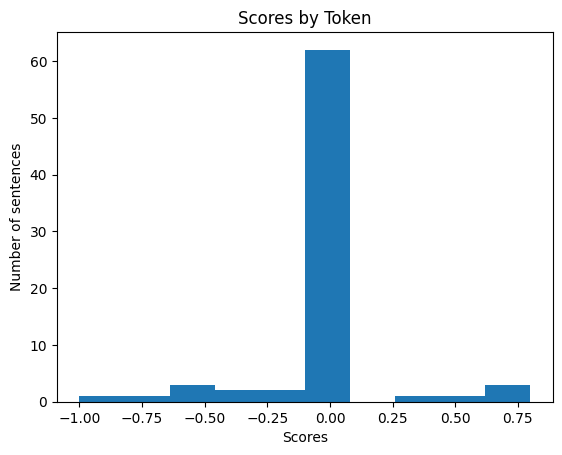

In [182]:
def score_token(sentence:str) -> int:
    # Spacy pipline
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("spacytextblob")
    doc = nlp(sentence)

    # List of tokens in sentence
    tokens_lower = [
        word.lower_
        for word in doc
        if not (
            word.is_space
            or word.is_punct
            or word.is_stop
            or word.is_digit
            or word.is_currency
            or re.search(r"\d", word.text)  # Regex to remove digits
        )
    ]
    # List of polarity score of each token in sentence
    polarity_score = [nlp(t)._.blob.polarity for t in tokens_lower]
    # Sum the score of each token to get total score for sentence
    s = sum(polarity_score)

    return s

token_scores = [score_token(line.text) for line in list_sentences]

# Histogram
plt.hist(token_scores)
plt.title("Scores by Token")
plt.xlabel("Scores")
plt.ylabel("Number of sentences")
plt.show()

#### 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

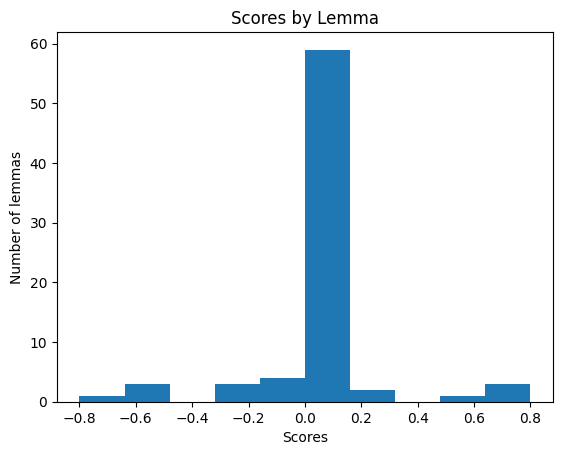

In [183]:
def score_lemma(sentence: str) -> dict:
    # Spacy pipline
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("spacytextblob")
    doc = nlp(sentence)

    # List of lemmas in sentence
    tokens_lower = [
        word.lemma_.lower()
        for word in doc
        if not (
            word.is_space
            or word.is_punct
            or word.is_stop
            or word.is_digit
            or word.is_currency
            or re.search(r"\d", word.text)  # Regex to remove digits
        )
    ]
    # List of polarity score of each lemma in sentence
    polarity_score = [nlp(t)._.blob.polarity for t in tokens_lower]
    # Sum the score of each lemma to get total score for sentence
    s = sum(polarity_score)

    return s

lemma_scores = [score_lemma(line.text) for line in list_sentences]

# Histogram
plt.hist(lemma_scores)
plt.title("Scores by Lemma")
plt.xlabel("Scores")
plt.ylabel("Number of lemmas")
plt.show()

#### 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.0 | `statistics.median(token_scores)` to get the median score.
* Cutoff Score (lemmas): 0.0 | `statistics.median(lemma_scores)` to get the median score

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

#### 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [184]:
import statistics

# Cutoff score for tokens


token_cutoff = statistics.median(token_scores)
print(f"Token cutoff: {token_cutoff}")

# List of token scores above cutoff


token_scores_cutoff = [x for x in token_scores if x > token_cutoff]

# Indices for token scores that are above cutoff
token_scores_cutoff_indices = [i for i,s in enumerate(token_scores) if s in token_scores_cutoff]

# Printing sentences from original list at indices with scores greater than cutoff
token_summary = []
for i in token_scores_cutoff_indices:
    token_summary.append(list_sentences[i])
print(*token_summary, sep="\n")

Token cutoff: 0.0
zom looks good to go
proud of my holdings m down nothing comparing to big boys but if ever single one in the page sell ll...
counterfeit shares and what we should be doing right now
found nice bottom melt up begins buy the dip
hamilton meets gamestop our rallying cry r wallstreetbets exclusive proudly made by ptgauth and in t...


#### 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [185]:
print(f"Number of sentences in summary: {len(token_summary)}")
token_summary = [line.text for line in token_summary]
token_string = " ".join(token_summary)
token_doc = nlp(token_string)
print(f"Polarity Score: {token_doc._.blob.polarity}")

Number of sentences in summary: 5
Polarity Score: 0.36984126984126986


#### 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [186]:
lemma_cutoff = statistics.median(lemma_scores)
print(f"Lemma cutoff: {lemma_cutoff}")

lemma_scores_cutoff = [x for x in lemma_scores if x > lemma_cutoff]
lemma_scores_cutoff_indices = [
    i for i, s in enumerate(lemma_scores) if s in lemma_scores_cutoff
]

list_sentences = [line for line in list_sentences]
lemma_summary = []
for i in lemma_scores_cutoff_indices:
    lemma_summary.append(list_sentences[i])
print(*lemma_summary, sep="\n")

Lemma cutoff: 0.0
zom looks good to go
proud of my holdings m down nothing comparing to big boys but if ever single one in the page sell ll...
even htmw won let me trade and it fake money
counterfeit shares and what we should be doing right now
found nice bottom melt up begins buy the dip
hamilton meets gamestop our rallying cry r wallstreetbets exclusive proudly made by ptgauth and in t...


#### 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [187]:
print(f"Number of sentences in summary: {len(lemma_summary)}")
lemma_summary = [line.text for line in lemma_summary]
lemma_string = " ".join(lemma_summary)
lemma_doc = nlp(lemma_string)
print(f"Polarity Score: {lemma_doc._.blob.polarity}")

Number of sentences in summary: 6
Polarity Score: 0.27319223985890656


#### 12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.
    
    The polarity score by token of each sentence is about 0.38 higher than the polarity score of the whole, which was about -0.0012. By removing unnecessary junk like digits, articles, etc., we can get a more accurate summary of each post and combine for an overall sentiment. With the slightly higher polarity scores, we can assume the stock market is doing well. If the polarity scores were low, then we can assume that the market is poor. Comparing historical data of the market from July and Aug, in which timeframe most of the posts analyzed come from, it is an accurate statement as the market trended upward.

#### 13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

    After a quick analysis of the 80 or so posts, I feel a slight majority of them denote a positive connotation as they show or imply wins, positive trends, etc.